<a href="https://colab.research.google.com/github/EderLara/CuadernosPythonParaML/blob/main/Optimizadores_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **¿Qué es GridSearchCV?**
GridSearchCV (Grid Search Cross-Validation) es una técnica exhaustiva y sistemática para encontrar la mejor combinación de hiperparámetros para un modelo de Machine Learning dado. En un proyecto de IA, un modelo no solo se entrena con datos, sino que también tiene "perillas" o configuraciones que debemos ajustar antes del entrenamiento; estas son los hiperparámetros.

Imagina que estás horneando un pastel y tienes muchas opciones para la cantidad de azúcar, la temperatura del horno y el tiempo de cocción. GridSearchCV es como probar sistemáticamente cada combinación posible de estas opciones, hornear un pastel con cada una, y luego elegir la combinación que produce el pastel más delicioso.

En el contexto de Machine Learning, GridSearchCV hace lo siguiente:

*   **Define una Cuadrícula:** Tú le proporcionas un diccionario con los hiperparámetros que quieres ajustar y una lista de valores posibles para cada uno.
*   **Explora Combinaciones:** GridSearchCV genera todas las combinaciones posibles de estos valores.
*   **Valida Cruzadamente Cada Combinación:** Para cada combinación, entrena y evalúa el modelo utilizando validación cruzada (Cross-Validation). Esto asegura que la evaluación sea robusta y no dependa de una única división de datos.
*   **Encuentra la Mejor Combinación:** Selecciona la combinación de hiperparámetros que produce la mejor puntuación promedio en la validación cruzada.
*   **Entrena el Mejor Modelo Final:** Una vez que encuentra los mejores hiperparámetros, entrena un modelo final con esa configuración utilizando todos los datos de entrenamiento.

### Atributos Clave de GridSearchCV

Cuando inicializas GridSearchCV, le pasas varios atributos importantes que controlan su comportamiento:

*   **estimator:**
    *   ¿Qué es? Es el modelo de Machine Learning (o "estimador") que deseas optimizar. Puede ser cualquier objeto que implemente las interfaces `fit` y `predict` (o `transform`, si es un preprocesador).
    *   Uso en IA: Aquí pasas tu `RandomForestRegressor`, `LinearRegression`, `SVC`, etc. Es el algoritmo base al que le buscarás los mejores ajustes.
*   **param\_grid:**
    *   ¿Qué es? Un diccionario donde las claves son los nombres de los hiperparámetros del `estimator` (tal como se nombran en la documentación del estimador) y los valores son listas de los valores que GridSearchCV debe probar para cada hiperparámetro.
    *   Uso en IA: Si tu modelo es un `RandomForestRegressor`, podrías tener `{'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}`. Cada combinación (ej. `n_estimators=50`, `max_depth=10`) se probará.
*   **scoring:**
    *   ¿Qué es? Especifica la métrica de evaluación que GridSearchCV utilizará para juzgar el rendimiento de cada combinación de hiperparámetros. Puede ser una cadena (ej. `'accuracy'`, `'f1'`, `'neg_mean_squared_error'`) o una función de puntuación.
    *   Uso en IA: Para regresión, podrías usar `'neg_mean_squared_error'` (el negativo del MSE, porque GridSearchCV siempre maximiza) o `'r2'`. Para clasificación, `'accuracy'`, `'f1_macro'`, `'roc_auc'`, etc. Elegir la métrica correcta es vital para que la optimización se alinee con los objetivos de tu proyecto.
*   **cv (Cross-Validation):**
    *   ¿Qué es? Determina la estrategia de validación cruzada a utilizar. Puede ser un entero (el número de "pliegues" para k-fold cross-validation), o un objeto de estrategia de validación cruzada (ej. `KFold`, `StratifiedKFold`).
    *   Uso en IA: Un valor común es 5 o 10. Si `cv=5`, tus datos de entrenamiento se dividen en 5 partes; el modelo se entrena 5 veces, cada vez usando 4 partes para entrenar y 1 para validar, y luego los resultados se promedian. Esto da una estimación más fiable del rendimiento del modelo.
*   **n\_jobs:**
    *   ¿Qué es? Un entero que especifica el número de CPU o núcleos a usar para paralelizar la ejecución.
    *   Uso en IA:
        *   `1`: Usa solo un núcleo (ejecución secuencial).
        *   `-1`: Usa todos los núcleos disponibles.
        *   `X`: Usa X núcleos.
        Usar `-1` es muy recomendable para acelerar el proceso de GridSearchCV, ya que entrena muchos modelos.
*   **verbose:**
    *   ¿Qué es? Un entero que controla el nivel de verbosidad (cuántos mensajes se imprimen durante la ejecución).
    *   Uso en IA:
        *   `0`: No imprime mensajes.
        *   `1`: Imprime una barra de progreso.
        *   `2`: Imprime una línea por cada combinación probada, mostrando los parámetros y el tiempo.
        Es útil para monitorear el progreso, especialmente en búsquedas largas.
*   **return\_train\_score:**
    *   ¿Qué es? Un booleano que determina si se deben calcular y almacenar las puntuaciones en el conjunto de entrenamiento para cada pliegue de validación cruzada.
    *   Uso en IA: Si es `True`, puedes analizar si el modelo está sobreajustando (puntuación de entrenamiento mucho mejor que la de validación) o subajustando (ambas puntuaciones bajas). Por defecto es `False`.

### Métodos Clave de GridSearchCV

Una vez que has inicializado tu objeto GridSearchCV, estos son los métodos principales que usarás:

*   **fit(X, y):**
    *   ¿Para qué se usa? Este es el método principal que ejecuta el proceso de búsqueda. Entrena el estimador para cada combinación de hiperparámetros en el `param_grid` utilizando la validación cruzada especificada. Después de probar todas las combinaciones, entrena un modelo final con los mejores hiperparámetros encontrados, utilizando todos los datos proporcionados (`X`, `y`).
    *   Uso en IA: Lo usarías después de dividir tus datos: `grid_search.fit(X_train, y_train)`.
*   **predict(X):**
    *   ¿Para qué se usa? Utiliza el mejor modelo encontrado y entrenado durante el proceso `fit` para hacer predicciones sobre nuevas instancias (`X`).
    *   Uso en IA: Una vez que `grid_search.fit()` ha terminado, puedes usar `grid_search.predict(X_test)` para obtener las predicciones en tu conjunto de prueba.
*   **predict\_proba(X)** (Solo para clasificadores que lo soporten):
    *   ¿Para qué se usa? Retorna las probabilidades de clase para las instancias en `X` utilizando el mejor clasificador.
    *   Uso en IA: Útil para problemas de clasificación donde necesitas saber la confianza del modelo en cada predicción (ej., para curvas ROC o ajustar umbrales).
*   **score(X, y):**
    *   ¿Para qué se usa? Evalúa el rendimiento del mejor estimador en el conjunto de datos dado (`X`, `y`) utilizando la métrica de puntuación por defecto del estimador.
    *   Uso en IA: `grid_search.score(X_test, y_test)` te dará rápidamente la puntuación del mejor modelo en tu conjunto de prueba, usando la métrica por defecto del estimador (ej., precisión para clasificadores).

### Atributos de Salida (Resultados) Importantes Después de fit()

Después de ejecutar `grid_search.fit()`, el objeto `grid_search` almacena los resultados y la información del mejor modelo en varios atributos:

*   **best\_estimator\_:**
    *   ¿Qué es? El estimador (modelo) que fue re-entrenado con los mejores hiperparámetros encontrados en todo el conjunto de datos de entrenamiento. Este es el modelo que usarías para hacer predicciones finales y guardarlo.
    *   Uso en IA: `best_model = grid_search.best_estimator_`. Este es el modelo optimizado que querrás usar y persistir.
*   **best\_params\_:**
    *   ¿Qué es? Un diccionario que contiene la combinación de hiperparámetros que dio la mejor puntuación promedio durante la validación cruzada.
    *   Uso en IA: `print(grid_search.best_params_)` te mostrará los valores de los hiperparámetros que resultaron ser los mejores.
*   **best\_score\_:**
    *   ¿Qué es? La puntuación promedio de validación cruzada (en base a la métrica `scoring` que especificaste) para la mejor combinación de hiperparámetros.
    *   Uso en IA: Te da una idea del rendimiento esperado del modelo en datos no vistos, antes de evaluarlo en el conjunto de prueba final.
*   **cv\_results\_:**
    *   ¿Qué es? Un diccionario que contiene información detallada sobre todos los resultados de la validación cruzada para cada combinación de hiperparámetros probada. Es muy útil para un análisis más profundo.
    *   Uso en IA: Puedes convertirlo en un DataFrame de Pandas (`pd.DataFrame(grid_search.cv_results_)`) para inspeccionar métricas como el tiempo de entrenamiento, la puntuación de entrenamiento, la puntuación de prueba (validación) y los hiperparámetros para cada iteración.

### Uso de GridSearchCV en un Proyecto de IA

1.  **Definición del Problema y Recopilación de Datos:** Claramente defines qué quieres predecir y recolectas tus datos.
2.  **Preprocesamiento de Datos:** Limpieza, manejo de valores faltantes, codificación de variables categóricas, escalado, etc. (como tu `X_processed` y `y_target`).
3.  **División de Datos:** `X_train`, `X_test`, `y_train`, `y_test`. GridSearchCV siempre se aplica solo al conjunto de entrenamiento.
4.  **Selección del Modelo Base:** Elige el algoritmo que crees que es apropiado para tu problema (ej., `RandomForestRegressor` para regresión).
5.  **Definición de param\_grid:** Basándote en la documentación del modelo y tu conocimiento del problema, define los rangos de hiperparámetros a explorar. ¡No pongas demasiados valores o la búsqueda será muy lenta!
6.  **Inicialización y Ejecución de GridSearchCV:**

  ```
  from sklearn.model_selection import GridSearchCV
  from sklearn.ensemble import RandomForestRegressor

  model = RandomForestRegressor(random_state=42)
  param_grid = {
      'n_estimators': [50, 100, 150],
      'max_depth': [10, 20, None]
  }
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                            cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
  grid_search.fit(X_train, y_train)

  ```

7. **Análisis de Resultados:**
  ```
  print(f"Mejores parámetros: {grid_search.best_params_}")
  print(f"Mejor puntuación (CV): {-grid_search.best_score_:.2f}") # Si usaste neg_MSE
  # Opcional: pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score')

  ```
  
8. **Evaluación Final en el Conjunto de Prueba:**
  ```
  y_pred_optimized = grid_search.best_estimator_.predict(X_test)
  mse = mean_squared_error(y_test, y_pred_optimized)
  r2 = r2_score(y_test, y_pred_optimized)
  print(f"MSE en test: {mse:.2f}, R2 en test: {r2:.2f}")
  ```

9. **Guardado del Modelo Optimizado:**
  ```
  import joblib
  joblib.dump(grid_search.best_estimator_, 'modelo_optimizad.pkl')
  ```

10. **Implementación:** Cargas el modelo guardado y lo usas para hacer predicciones en datos nuevos en producción.

`GridSearchCV` es una herramienta robusta que te ayuda a automatizar una parte crucial de la optimización del modelo, asegurando que encuentres una configuración de hiperparámetros que generalice bien a datos no vistos.

Iniciando la búsqueda de hiperparámetros con GridSearchCV (esto puede tomar un momento)...
Fitting 3 folds for each of 9 candidates, totalling 27 fits

Búsqueda de hiperparámetros completada.
Mejores hiperparámetros encontrados: {'max_depth': 20, 'n_estimators': 150}
Mejor MSE (promedio de CV): 1182.71

--- DataFrame de resultados de cv_results_ (primeras 5 filas) ---
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.259378      0.032793         0.017034        0.001928   
1       0.466057      0.065770         0.031105        0.005574   
2       1.058722      0.129303         0.044642        0.025941   
3       0.333329      0.048710         0.024783        0.004793   
4       0.522586      0.094575         0.023656        0.012323   

  param_max_depth  param_n_estimators                                  params  \
0              10                  50   {'max_depth': 10, 'n_estimators': 50}   
1              10                 100  {'max_depth': 10, 'n_esti

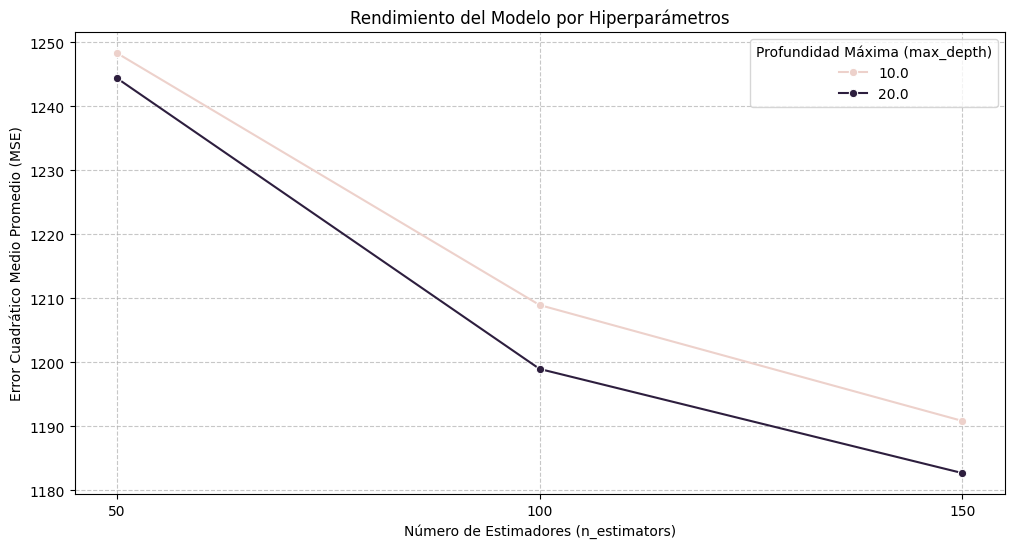

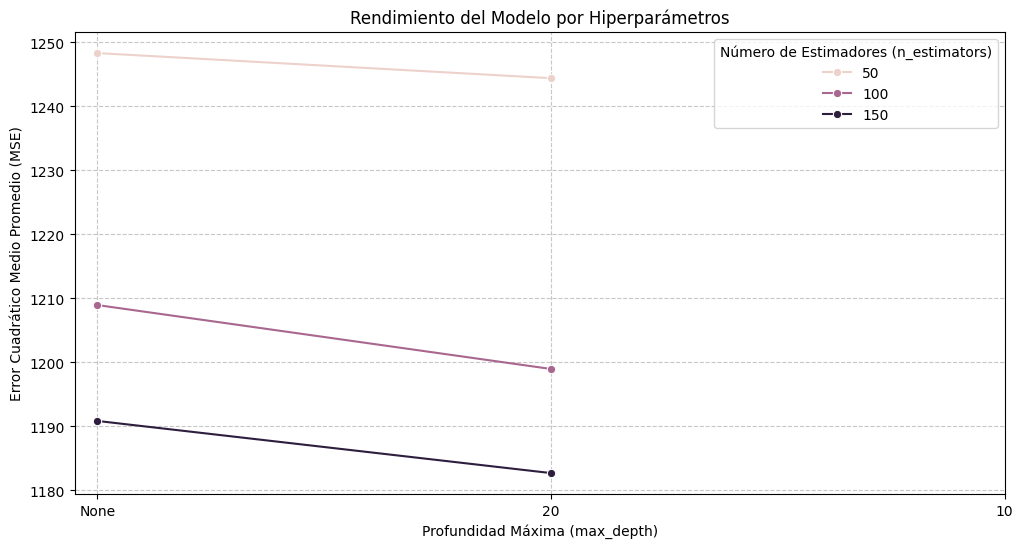

In [2]:
# Ejemplo práctico:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression # Para crear un dataset de ejemplo rápido

# --- 1. Crear un dataset de ejemplo (si no tienes uno real a mano) ---
# En un proyecto real, aquí usarías tus X_train y y_train
X_train_sample, y_train_sample = make_regression(n_samples=500, n_features=5, noise=0.5, random_state=42)
X_train_sample = pd.DataFrame(X_train_sample, columns=[f'feature_{i}' for i in range(5)])

# --- 2. Inicializar y Ejecutar GridSearchCV ---
model = RandomForestRegressor(random_state=42)

param_grid = {
    "n_estimators": [50, 100, 150],  # Número de árboles
    "max_depth": [10, 20, None]      # Profundidad máxima
}

print("Iniciando la búsqueda de hiperparámetros con GridSearchCV (esto puede tomar un momento)...")
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3,                 # 3 pliegues para validación cruzada
                           n_jobs=-1,            # Usar todos los núcleos de CPU
                           verbose=1,            # Mostrar progreso
                           scoring="neg_mean_squared_error", # Métric a para optimizar
                           return_train_score=True) # Importante para ver el sobreajuste

grid_search.fit(X_train_sample, y_train_sample)

print("\nBúsqueda de hiperparámetros completada.")
print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")
print(f"Mejor MSE (promedio de CV): {-grid_search.best_score_:.2f}")

# --- 3. Convertir cv_results_ a un DataFrame ---
results_df = pd.DataFrame(grid_search.cv_results_)

print("\n--- DataFrame de resultados de cv_results_ (primeras 5 filas) ---")
print(results_df.head())

# --- 4. Interpretación del DataFrame de resultados ---

# Seleccionar columnas relevantes para un análisis más claro
# 'param_': Son los hiperparámetros probados.
# 'mean_test_score': Es la puntuación promedio de validación cruzada (neg_MSE en este caso).
# 'std_test_score': Desviación estándar de la puntuación de prueba entre los pliegues (indica variabilidad).
# 'mean_train_score': Puntuación promedio en los conjuntos de entrenamiento de CV.
# 'rank_test_score': El ranking de cada combinación (1 es el mejor).
# 'mean_fit_time': Tiempo promedio de entrenamiento.
# 'mean_score_time': Tiempo promedio de puntuación.
relevant_cols = [
    'param_n_estimators', 'param_max_depth',
    'mean_test_score', 'std_test_score', 'mean_train_score',
    'rank_test_score', 'mean_fit_time', 'mean_score_time'
]

results_df_cleaned = results_df[relevant_cols].copy()

# Convertir la puntuación de MSE negativo a positivo para una mejor comprensión
results_df_cleaned['mean_test_mse'] = -results_df_cleaned['mean_test_score']
results_df_cleaned['mean_train_mse'] = -results_df_cleaned['mean_train_score']

# Eliminar las columnas originales de puntuación negativa si lo prefieres
results_df_cleaned = results_df_cleaned.drop(columns=['mean_test_score', 'mean_train_score'])

# Ordenar los resultados por el ranking (el mejor primero)
results_df_cleaned = results_df_cleaned.sort_values(by='rank_test_score').reset_index(drop=True)

print("\n--- DataFrame de resultados relevantes y ordenados ---")
print(results_df_cleaned)

# --- 5. Análisis de Resultados Específicos ---

print("\n--- Análisis Detallado ---")

# El mejor modelo (rank_test_score == 1)
best_run = results_df_cleaned[results_df_cleaned['rank_test_score'] == 1]
print(f"\nMejor combinación (según CV):")
print(best_run)

# ¿Hay sobreajuste? Compara 'mean_train_mse' con 'mean_test_mse'
# Si mean_train_mse es mucho más bajo que mean_test_mse, indica sobreajuste.
# Un buen equilibrio es cuando son cercanos, pero el de entrenamiento siempre será un poco mejor.
print("\nAnálisis de sobreajuste (Train vs Test MSE):")
for index, row in results_df_cleaned.iterrows():
    print(f"  Combo {index+1} (n_est={row['param_n_estimators']}, max_depth={row['param_max_depth']}):")
    print(f"    Train MSE: {row['mean_train_mse']:.2f}, Test MSE: {row['mean_test_mse']:.2f}, Std Test: {row['std_test_score']:.2f}")
    if row['mean_train_mse'] < row['mean_test_mse'] * 0.8: # Umbral arbitrario para detectar sobreajuste
        print("    -> ¡Posible sobreajuste detectado!")

# Impacto de n_estimators
print("\nImpacto de n_estimators en el rendimiento:")
results_by_n_estimators = results_df_cleaned.groupby('param_n_estimators')['mean_test_mse'].mean().reset_index()
print(results_by_n_estimators)

# Impacto de max_depth
print("\nImpacto de max_depth en el rendimiento:")
results_by_max_depth = results_df_cleaned.groupby('param_max_depth')['mean_test_mse'].mean().reset_index()
print(results_by_max_depth)

# Visualización de los resultados (opcional pero muy recomendado)
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df_cleaned, x='param_n_estimators', y='mean_test_mse', hue='param_max_depth', marker='o')
plt.title('Rendimiento del Modelo por Hiperparámetros')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('Error Cuadrático Medio Promedio (MSE)')
plt.xticks(results_df_cleaned['param_n_estimators'].unique())
plt.legend(title='Profundidad Máxima (max_depth)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df_cleaned, x='param_max_depth', y='mean_test_mse', hue='param_n_estimators', marker='o')
plt.title('Rendimiento del Modelo por Hiperparámetros')
plt.xlabel('Profundidad Máxima (max_depth)')
plt.ylabel('Error Cuadrático Medio Promedio (MSE)')
# Para el eje x, manejamos None para la visualización si es necesario
unique_depths = results_df_cleaned['param_max_depth'].unique()
plt.xticks([d for d in unique_depths if d is not None] + [30] if None in unique_depths else unique_depths,
           labels=[str(d) for d in unique_depths]) # Ajuste para None
plt.legend(title='Número de Estimadores (n_estimators)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **Explicación de la Interpretación**
Al convertir cv_results_ en un DataFrame (results_df_cleaned), obtenemos una tabla con una fila por cada combinación de hiperparámetros probada. Las columnas clave para interpretar son:

1. **param_n_estimators, param_max_depth (y otros param_XYZ):**

  * Estas columnas te muestran la combinación específica de hiperparámetros que se probó en esa fila. Es crucial para saber qué configuración produjo qué resultado.

2. **mean_test_mse (o la métrica de tu scoring):**

  * Este es el rendimiento promedio del modelo en los conjuntos de validación durante la validación cruzada para esa combinación de hiperparámetros. Es la métrica principal que `GridSearchCV` utiliza para clasificar los modelos. Un valor más bajo de MSE es mejor.
  * **Interpretación:** Te dice cuán bien se espera que esa combinación de hiperparámetros generalice a datos no vistos.

3. **std_test_score (o std_test_mse en nuestro caso):**

  * Es la desviación estándar de la puntuación de prueba a través de los diferentes pliegues de validación cruzada.
  * **Interpretación:** Un std bajo indica que el rendimiento del modelo fue consistente en todos los pliegues, lo que sugiere que es más robusto. Un std alto podría indicar que el modelo es sensible a las particiones específicas de los datos, lo que es una señal de alerta.

4. **mean_train_mse (o la métrica de tu scoring para el entrenamiento):**

  * Es el rendimiento promedio del modelo en los conjuntos de entrenamiento durante la validación cruzada. Solo está disponible si return_train_score=True se estableció en GridSearchCV.
  * **Interpretación (para detectar sobreajuste/subajuste):**
    * Si mean_train_mse es mucho más bajo que mean_test_mse, es una clara señal de sobreajuste (overfitting). El modelo está aprendiendo demasiado bien los datos de entrenamiento pero no generaliza a datos nuevos.
    * Si ambos mean_train_mse y mean_test_mse son altos, puede indicar subajuste (underfitting). El modelo no es lo suficientemente complejo o potente para aprender las relaciones en los datos, ni siquiera en el entrenamiento.
    * Idealmente, mean_train_mse debería ser un poco mejor que mean_test_mse, pero no drásticamente.

5. **rank_test_score:**

  * Un número entero que indica el ranking de cada combinación de hiperparámetros basándose en mean_test_score. 1 es el mejor rendimiento.
  * **Interpretación:** Te permite identificar rápidamente las mejores combinaciones.

6. **mean_fit_time y mean_score_time:**

  * Tiempo promedio que tardó el modelo en entrenar y en hacer predicciones (evaluar) en cada pliegue.
  * **Interpretación:** Útil para consideraciones de rendimiento y eficiencia. Un modelo con un rendimiento ligeramente peor pero que entrena y predice mucho más rápido podría ser preferible en entornos de producción donde el tiempo es crítico. Por ejemplo, podrías optar por una combinación de hiperparámetros con un rank_test_score de 2 o 3 si su tiempo de entrenamiento es significativamente menor que la combinación con rank_test_score de 1.

## **¿Por qué es importante esta interpretación?**
Aunque best_params_ te da la "mejor" combinación automática, al mirar `cv_results_` puedes:

  * Entender el Trade-off: Ver si un pequeño aumento en la complejidad (ej., más n_estimators) produce una mejora marginal en el rendimiento pero un gran aumento en el tiempo de entrenamiento.
  * Identificar Regiones Óptimas: Ver si el mejor parámetro está en el borde de tu param_grid. Si lo está, quizás necesites ampliar el rango de búsqueda para ese hiperparámetro.
  * Detectar Sobreajuste/Subajuste: La comparación entre las puntuaciones de entrenamiento y prueba (validación) es una herramienta poderosa.
  * Elegir un modelo "suficientemente bueno": A veces, el modelo con el ranking 1 no es el más práctico. Un modelo con un ranking de 2 o 3 podría tener un rendimiento casi idéntico pero ser mucho más rápido o menos propenso a sobreajustarse.

